<a href="https://colab.research.google.com/github/Jakoco/UnderLearning/blob/main/Computer_Vision_%26_Convolutional_Neural_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Computer Vision

## 0.Computer viosion libaries in PyTorch
* torchvision - Base domain library for PyTorch computer vision.
* torchvision.datasets - Get datasets and data loading for computer vision
* torchvision.models - et pretrained computer vision models that can leverage Jakoco's problems.
* torchvision.transforms - Functions for manipulating Jakoco's vision data(images) to be suitable for use with the ML model.
* torch.utils.data.Dataset - Basa dataset class for PyTorch.
torch.utils.data.DataLoader - Creates a Python iterable over a dataset.

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## 1.Getting a dataset
The dataset Jakoco will be using is FashionMNISt from torchvision.dataset.

In [2]:
# Setup training data

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",# Where to download data?
    train=True,# Does Jakoco want the trainig dataset?
    download=True,# Does Jakoco Want to download?
    transform=torchvision.transforms.ToTensor(),# How does Jakoco want to transform the data?
    target_transform=None # How does Jakoco want to transform the labels/targets?
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)



100%|██████████| 26421880/26421880 [00:01<00:00, 16546337.74it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 314060.72it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5406685.53it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12103294.28it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# visualize data
len(train_data),len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
# Check the shape
image, label = train_data[0]
print(f"Image shape: {image.shape} -> [color_channels,height,width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image label: Ankle boot


### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

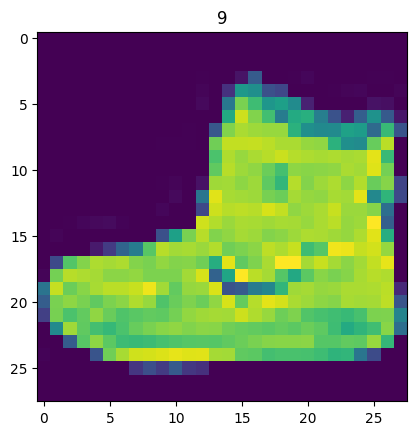

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())# Jakoco must remove the singular dimension.
plt.title(label)

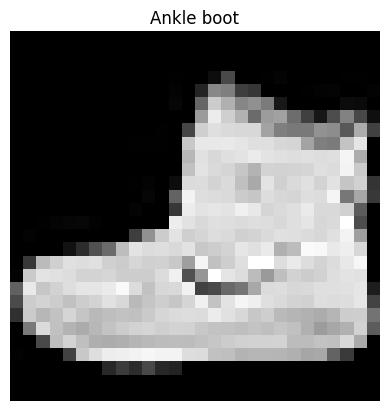

In [9]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

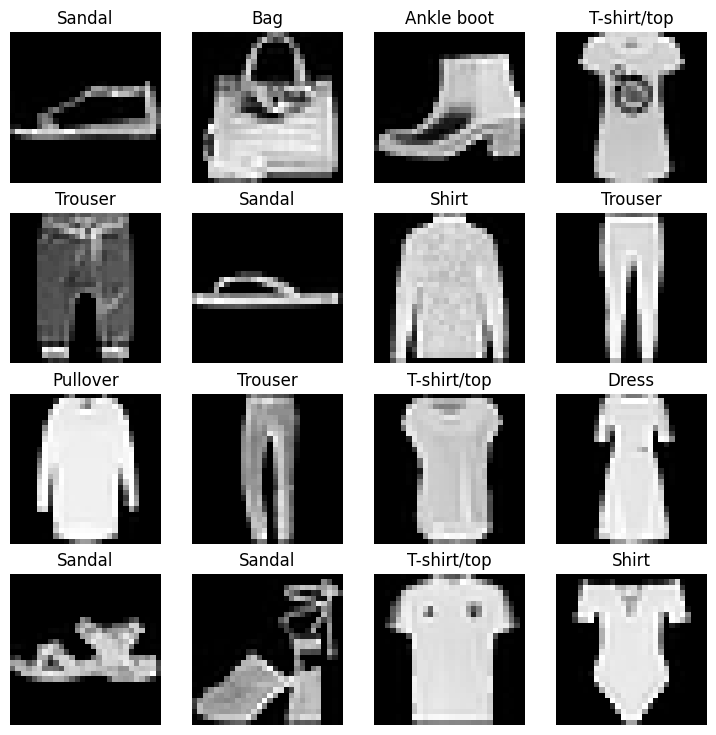

In [10]:
# Plot more images
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

## 2.Prepare DataLoader

Right now, Jakoco's datais in the form of PyTorch Datasets.
Dataloder turns them into Python iterable.
More specifically, I'd like to turn them into batches (or mini-batches).

Reasons to do this:
1. It is more computationally efficient, as in, Jakoco's ALIENWARE hardwares may not be able to look (store in memory) at 60000 images in one hit. So Jakoco break it down to 32 image at a time (batch size of 32).
2. It gives our neural network more chances to updata its gradients per epoch.

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE =32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                batch_size=BATCH_SIZE,
                shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                batch_size=BATCH_SIZE,
                shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e108797b910>,
 <torch.utils.data.dataloader.DataLoader at 0x7e108797bc70>)

In [12]:
# Check out what's i side the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


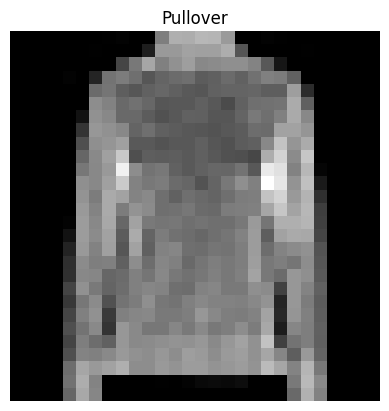

In [13]:
# Show a sample
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3.MOdel 0: build a basline model

When starting to build a series of machine learning modelling experiments, it's best practice to star with a baseline model.

A baseline model is a simple model I'll try and impprove upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [14]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Preint out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels,height,width]")
print(f"Shape after flattening: {output.shape} -> [color_channels,height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels,height*width]


In [15]:
28*28

784

In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(
      self,
      input_shape:int,
      hidden_units:int,
      output_shape:int,
  ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units
        ),
        nn.Linear(
            in_features=hidden_units,
            out_features=output_shape
        )
    )

  def forward(self,x):
    return self.layer_stack(x)


In [17]:
# Setup model with input parameyers
model_0 = FashionMNISTModelV0(
    input_shape=784, # This is 28*28
    hidden_units=10, # How many units in the hidden layer
    output_shape=len(class_names)
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.1908, -0.1271, -0.0153, -0.5216, -0.0089, -0.1608,  0.2224,  0.1551,
         -0.1487, -0.0347]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - Since Jakoco are working with multiclass data, the loss function will be nn.CrossEntropyLoss()
* Optimizer - It is torch.optim.SGD() (stochastic gradient descent).
* Evaluation metric - Since Jakoco are working on a classification problem, Accruacy can be the evaluation metric.

In [19]:
# Calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [20]:
import requests
from pathlib import Path

# Download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

In [21]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### 3.2 Creating a function to time the experiments

Machine learning is very experimental.

Two of the main things Jakoco will often want to track are:
1. Model's performance(loss and accuracy values etc)
2. How fast it runs.

In [22]:
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device = None):
  # Print difference between start and end time.
  total_time = end - start
  print(f"Train time on {device}:{total_time:.3f} seconds")
  return total_time

In [23]:
start_time = timer()
# Some code...
end_time = timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu:0.000 seconds


4.9805000003289024e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happening.
5. Time it all (personal interst).

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
train_time_start_on_cpu = timer()

# Set the number of epochs (Jakooco meaned to keep this small for faster training time)

epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop thrugh the training batches
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(x)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss

    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(x)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss,test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for x_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(x_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y_test)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss : {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()))

)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5872 | Test loss : 0.5597, Test acc: 80.8906
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4767 | Test loss : 0.4914, Test acc: 82.8574
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4539 | Test loss : 0.4763, Test acc: 82.9673
Train time on Parameter containing:
tensor([[-0.0121,  0.0124,  0.0015,  ..., -0.0140, -0.0485, -0.0311],
        [-0.0309, -0.0071,  0.0228,  ..., -0.0663, -0.0768, -0.0263],
        [-0.0187,  0.0266,  0.0077,  ..., -0.0403, -0.0064, -0.0083],
        ...,
        [-0.0027,  0.0337,  0.0352,  ...,  0.0158,  0.0436,  0.

## 4.Make prediction and get model 0 results

In [87]:
# Return a dictionary containing the results of model predicting on data_loader.
def eval_model(
    model:torch.nn.Module,
    data_loader:torch.utils.data.DataLoader,
    loss_fn:torch.nn.Module,
    accuracy_fn
):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for x, y in data_loader:
      # Make predictions
      y_pred = model(x)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(
          y_true=y,
          y_pred=y_pred.argmax(dim=1)
      )

    # Scale loss and acc to fing the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{
      "model_name": model.__class__.__name__, # Only works when model was created with a class
      "model_loss": loss.item(),
      "model_acc": acc
  }

# Calculate model 0 results on test dataset
model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4763277769088745,
 'model_acc': 82.96725239616613}

## 5.Setup device agnostic-code (for using GPU if there is one)

In [26]:
torch.cuda.is_available()

False

In [27]:
# Setuop device-agnostic code
import torch
device = "code" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6.Model 1: Building a better model with non-linearity



In [28]:
# Create a model with both linear & non-linear layers
class FashionMNISTModelV0(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int
  ):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units
        ),
        nn.ReLU(),
        nn.Linear(
            in_features=hidden_units,
            out_features=output_shape
        ),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [29]:
Model_1 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)

In [30]:
Model_1

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1Setup loss, optimizer and evaluation metrics

In [31]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model_1.parameters(),lr=0.1)

### 6.2Functionizing training and evaluation/testing loops

Create a function for:
* training loop - train_step()
* testing loop - test_step()

In [32]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer:torch.optim.Optimizer,
    accuracy_fn,
    device: torch.device = device
):
  """Performs a training with model trying to learn on data_loader."""

  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop thrugh the training batches
  for batch, (x,y) in enumerate(data_loader):
    # 1. Forward pass
    y_pred = model(x)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(
        y_true=y,
        y_pred=y_pred.argmax(dim=1)
    )
    # 3. Optimzer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [33]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device:torch.device = device
):

  """Performs a testing loop step on model going over data_loader."""

  test_loss,test_acc = 0, 0
  # Put the model in eval mode
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      # 1. Forward pass
      test_pred = model(x)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred,y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per batch
    test_acc /= len(data_loader)

  # Print out what's happening
  print(f"Test loss : {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

In [34]:
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

epochs = 3

# Create a optimzation and evaluation loop using train_step( and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------------------")
  train_step(
      model=Model_1,
      data_loader=train_dataloader,
      loss_fn=loss_fn,# Frustrated me this stupid bug
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
      device=device
  )
  test_step(
      model=Model_1,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
      device=device
  )

train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_start_on_cpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------------------
Train loss: 0.70777 | Train acc: 76.29%
Test loss : 0.52415, Test acc: 80.96%

Epoch: 1
--------------------
Train loss: 0.47157 | Train acc: 83.14%
Test loss : 0.46579, Test acc: 82.87%

Epoch: 2
--------------------
Train loss: 0.44360 | Train acc: 84.04%
Test loss : 0.46888, Test acc: 82.88%

Train time on cpu:0.000 seconds


In [88]:
# Otherwise
Model_1_results = eval_model(
    model=Model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)
Model_1_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4688757359981537,
 'model_acc': 82.87739616613419}

## 7.Model 2: A Convolutional Neural Network (CNN)

CNN's are also known ConvNets.
CNN's are Known for their capabilities to find patterns in visual data.

In [36]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int
  ):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ), # values that can be set in NN's are called hyperparameters.
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7, # It is a trick to calculating this.
            out_features=output_shape
        )
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x) # Jakoco used to set out the "classifier" instead of calling it.
    return x


In [37]:
Model_2 = FashionMNISTModelV2(
    input_shape=1,# equal to color channel
    hidden_units=10,
    output_shape=len(class_names)
)

In [38]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [39]:
# pass image through model
Model_2(rand_image_tensor.unsqueeze(0))# Here comes why hidden_units*7*7

tensor([[ 0.0347, -0.0941, -0.0178,  0.0304,  0.0320,  0.0967,  0.0244, -0.0266,
         -0.0280,  0.0201]], grad_fn=<AddmmBackward0>)

### 7.1Stepping through `nn.Conv2d()`

In [40]:
# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[-3.3029,  1.1067, -0.5697,  ...,  0.9121,  1.1176,  0.9346],
         [ 0.9476,  1.0713,  0.0156,  ...,  0.4779, -0.7453, -0.0431],
         [ 1.0852, -0.0138,  1.5798,  ...,  0.4543, -1.2665,  0.8085],
         ...,
         [ 0.6143, -0.7902,  0.9194,  ..., -0.5009,  0.0201, -0.6726],
         [-0.2093,  0.4123, -0.8019,  ..., -0.4261, -1.7137, -0.8730],
         [-1.5086,  0.4445, -0.9415,  ...,  0.4082, -0.6401,  0.7292]],

        [[-0.9953,  1.3691, -0.1083,  ...,  0.6369,  1.5483, -1.1755],
         [-2.1632, -2.1999,  1.0277,  ...,  1.4996, -0.2847, -0.1017],
         [-3.0562, -0.6103, -1.4083,  ..., -0.3351, -1.4912, -0.4197],
         ...,
         [ 1.0385,  0.1387,  1.1705,  ..., -1.1077,  0.2692,  0.2327],
         [ 0.2329,  0.4239, -0.1169,  ..., -2.0012,  0.6130, -1.7790],
         [-0.2104,  0.0096, -1.7833,  ...,  0.9594, -1.7541,  1.0590]],

        [[-0.486

In [41]:
# Create a single conv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=3,
    stride=1,
    padding=0
)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.size()

torch.Size([1, 10, 62, 62])

In [42]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2Stepping through `nn.MaxPool2D`

In [43]:
test_image.shape

torch.Size([3, 64, 64])

In [44]:
# Print out original image shape without unsquezed dimsion
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimensionn: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through Just the Conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_iamge_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_iamge_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimensionn: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


###7.3 Setup a loss function and optimizer for `Model_2`

In [45]:
# Setup loss function/eval metrics/optimizer
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model_2.parameters(),lr=0.1)

###7.4 Traning and testing `Model_2` using Jakoco's deep dark fanciful function

In [46]:
# Measure time
from timeit import default_timer as timer
train_timer_start_Model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(
      model=Model_2,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn,
  )
  test_step(
      model=Model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn,
  )

  train_timer_end_Model_2 = timer()
  total_train_time_Model_2 = print_train_time(
      start=train_timer_start_Model_2,
      end=train_timer_end_Model_2,
  )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.66955 | Train acc: 75.73%
Test loss : 0.39798, Test acc: 85.99%

Train time on None:59.702 seconds
Epoch: 1
-------
Train loss: 0.35806 | Train acc: 87.13%
Test loss : 0.34035, Test acc: 87.84%

Train time on None:118.935 seconds
Epoch: 2
-------
Train loss: 0.32130 | Train acc: 88.43%
Test loss : 0.33764, Test acc: 88.06%

Train time on None:178.222 seconds


In [89]:
# Get Model_2 results
Model_2_results = eval_model(
    model=Model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

Model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3376389145851135,
 'model_acc': 88.0591054313099}

##8.Make and evaluate random predictions with model

In [48]:
def make_predictions(
    model:torch.nn.Module,
    data: list,
):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim=0)

      # Forward pass
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)

      # Get pred_prob off GPU if necessary. Fine, it's must.
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [49]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Jakoco'd like to view the first sample shape.
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Dress')

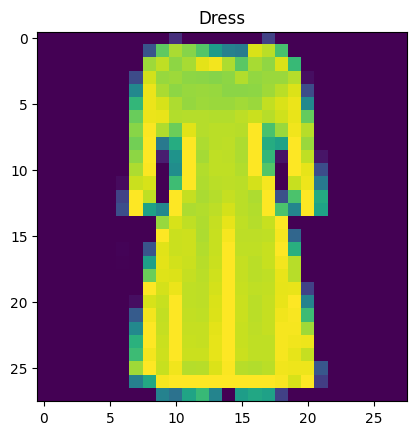

In [50]:
plt.imshow(test_samples[0].squeeze())
plt.title(class_names[test_labels[0]])

In [51]:
# Make predictions
pred_probs = make_predictions(
    model=Model_2,
    data=test_samples
)

# View first two prediction probabilities
pred_probs[:2]

tensor([[9.1501e-03, 3.0118e-06, 1.3567e-04, 9.8729e-01, 3.9481e-06, 8.6080e-07,
         3.4008e-03, 5.8078e-06, 1.1921e-05, 1.8202e-07],
        [2.0040e-04, 6.5934e-05, 9.9597e-01, 2.2398e-04, 5.3258e-04, 2.7487e-06,
         3.0051e-03, 3.2477e-08, 1.9490e-06, 1.1098e-06]])

In [52]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([3, 2, 2, 9, 3, 0, 6, 2, 6])

In [53]:
# Here is test labels
test_labels

[3, 2, 2, 9, 3, 0, 6, 2, 6]

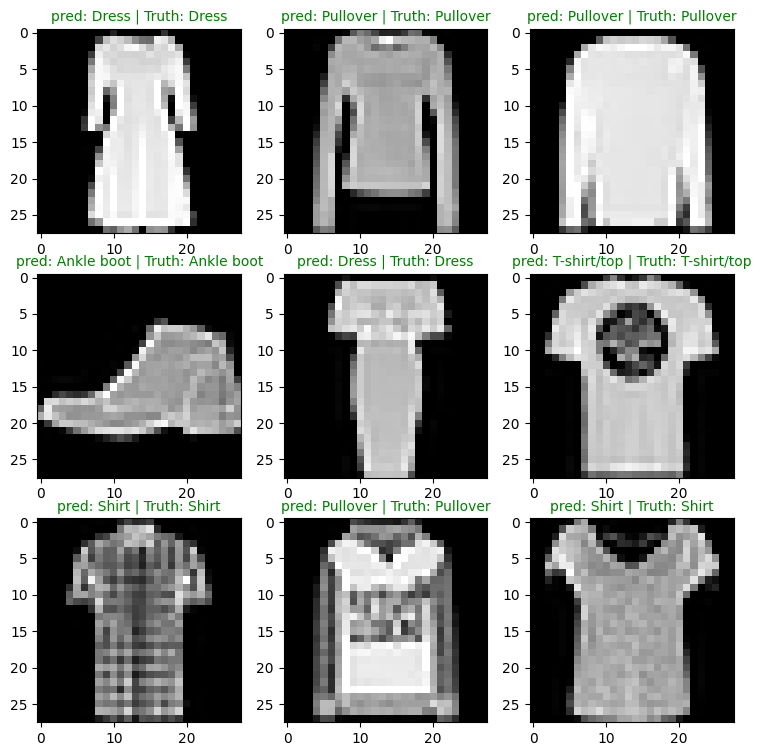

In [54]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  # Find the prediction
  pred_label =class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g") # if green, if lucky.
  else:
    plt.title(title_text,fontsize=10,c="r") # otherwise, hell red.

##9.Makeing a confusion matrix for further prediction evaluation

In [61]:
from tqdm.auto import tqdm

# 1.Make predictions with trained model
y_preds = []
Model_2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="Making predictions..."):
    y_logit = Model_2(x)
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
len(y_pred_tensor)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

10000

In [67]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 22, "Mlxtend version ought be 0.22.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  print(f"torchmetrics version: {torchmetrics.__version__}")

mlxtend version: 0.22.0
torchmetrics version: 1.1.1
mlxtend version: 0.22.0
torchmetrics version: 1.1.1


In [76]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(
    preds = y_pred_tensor,
    target = test_data.targets
)

In [77]:
confmat_tensor

tensor([[592,   4,  30,  83,  13,   0, 266,   1,  11,   0],
        [ 11, 879,   6,  83,  12,   0,   8,   0,   1,   0],
        [ 10,   4, 778,  17, 115,   0,  70,   0,   6,   0],
        [ 23,  10,  18, 882,  24,   0,  40,   0,   3,   0],
        [  3,   4, 110,  70, 726,   0,  82,   0,   5,   0],
        [ 10,   1,   0,  14,   0, 806,   4,  59,  90,  16],
        [ 75,   6, 101,  75, 107,   0, 625,   0,  11,   0],
        [  1,   0,   1,   2,   0,  26,   0, 893,  16,  61],
        [ 16,   2,  17,  20,   9,   6,  18,   8, 903,   1],
        [  3,   0,   0,   6,   2,  24,   4,  62,  11, 888]])

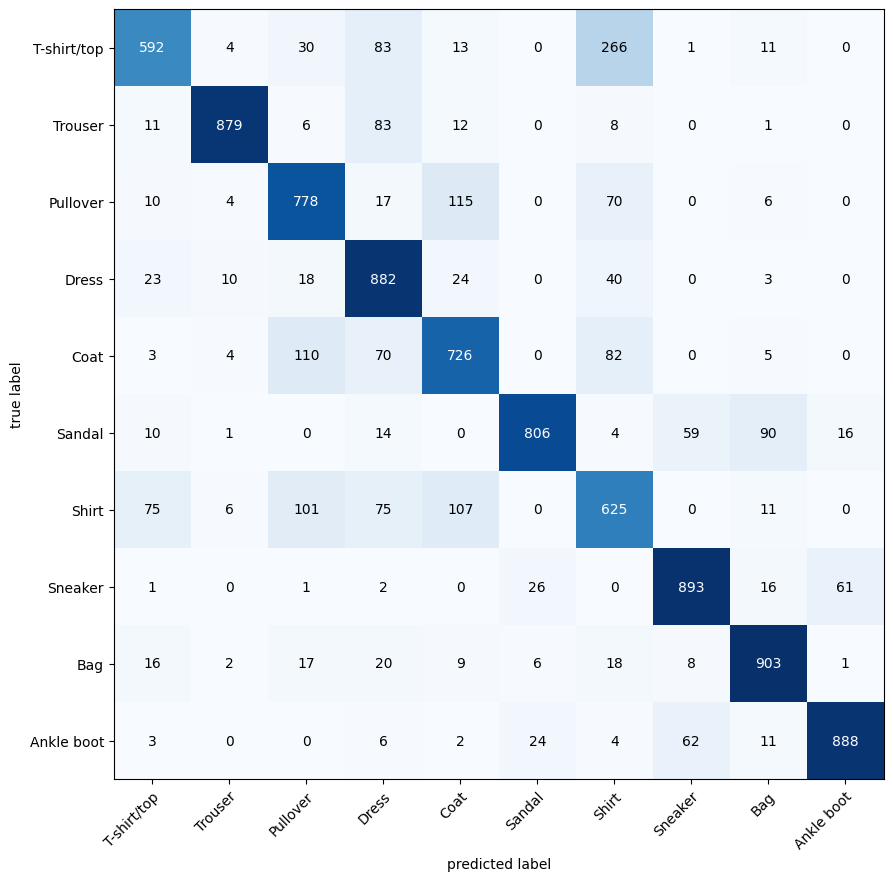

In [80]:
# plot the confusion matrix
fig,ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,10)
)
# Roughly, Model_2 convinced that T-shirt/top have few difference with shirt, and coat or pullover are the same things.
# As a human, however, Jakoco won't.

##10.Save and laod a model

In [83]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(
    parents=True,
    exist_ok=True
)

# Create model save
MODEL_NAME = "03_PyTorch_Computer_Version_Model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=Model_2.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/03_PyTorch_Computer_Version_Model_2.pth


In [84]:
# Create a new instance
loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [90]:
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3376389145851135,
 'model_acc': 88.0591054313099}

In [93]:
# Check if model results are close to each other
torch.isclose(
    torch.tensor(Model_2_results["model_loss"]),
    torch.tensor(loaded_model_2_results["model_loss"]),
    atol=1e-02
)

tensor(True)